In [1]:
!pip install neuron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 50.6 MB/s eta 0:00:00


**Figure 1**

Voltage clamping
```
Current = 0.1 nA
```


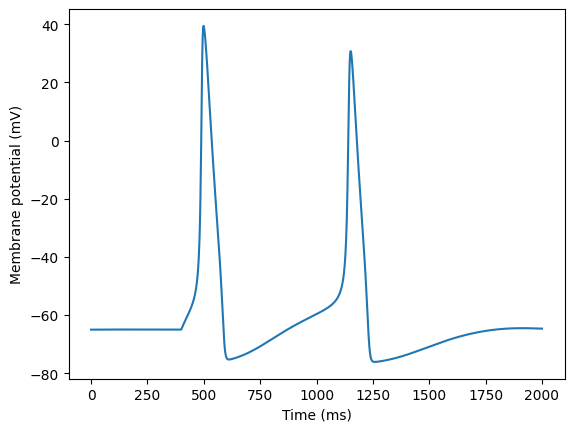

In [3]:
from neuron import h, gui
import matplotlib.pyplot as plt

# Create a soma section
soma = h.Section(name='soma')

# Define the membrane properties of the soma
soma.insert('hh')
soma.Ra = 100   # Axial resistance in Ohm*cm
soma.cm = 1     # Membrane capacitance in uF/cm^2
soma.diam = 20  # Diameter in um
soma.L = 20     # Length in um

# Set the simulation parameters
h.tstop = 50    # Simulation time in ms
h.dt = 0.025    # Time step in ms

# Inject a constant current
stim = h.IClamp(soma(0.5))
stim.delay = 10  # Delay in ms
stim.dur = 20    # Duration in ms
stim.amp = 0.1   # Amplitude in nA

#0.2830 imp...

# Record the membrane potential
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

# Run the simulation
h.finitialize(-65)  # Set the initial membrane potential
h.run()

# Plot the results

plt.plot(rec_v)
# plt.text(15, 0, 'Sine wave', fontsize = 15)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')

plt.show()


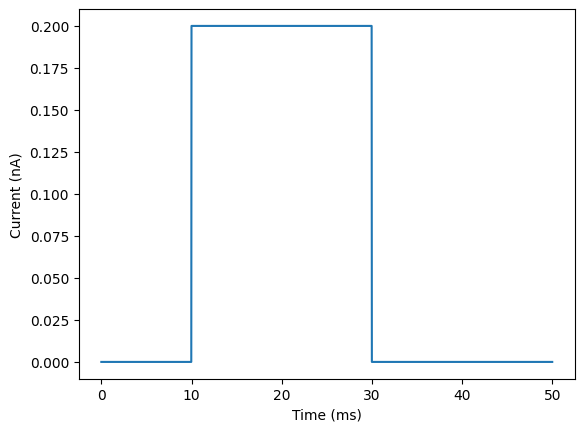

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set the simulation parameters
t_start = 0     # Start time in ms
t_stop = 50     # Stop time in ms
dt = 0.025      # Time step in ms
current_dur = 20    # Current duration in ms
current_amp = 0.2   # Current amplitude in nA

# Create a time array
t = np.arange(t_start, t_stop+dt, dt)

# Create a current array with a constant amplitude during the current duration
current = np.zeros_like(t)
current[(t>=10) & (t<30)] = current_amp

# Plot the current graph
plt.plot(t, current)
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.show()


**Figure 2**

Variation of ionic currents & membrane potential with time

a) Membrane Potential

b) Sodium current

c) Potassium current
**bold text**

In [5]:
#Insert code for part a) b) c) here

**Figure 3**

Variation of Sodium conductance with time

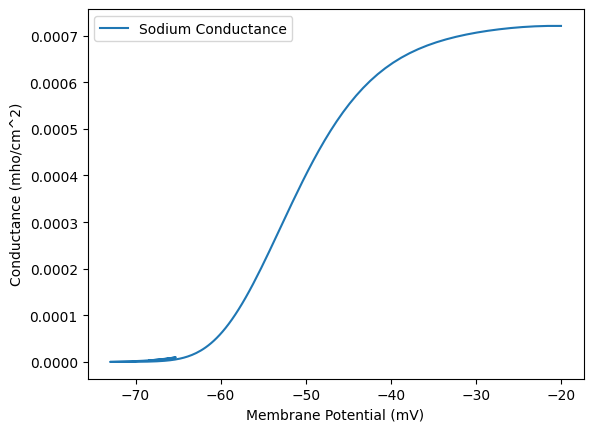

In [6]:
from neuron import h, gui
import matplotlib.pyplot as plt

# Create a new neuron section
soma = h.Section(name='soma')

# Define the membrane properties of the neuron
soma.insert('hh')  # Add Hodgkin-Huxley channels
soma.Ra = 100     # Axial resistance in Ohms
soma.cm = 15     # Membrane capacitance in uF/cm^2
soma.L = 100       # Axial length in um

# Create a voltage clamp to control the membrane potential
stim = h.IClamp(soma(0.5))
stim.delay = 50    # Delay in ms
stim.dur = 400     # Duration in ms
stim.amp = -5 # Clamp potential in mV

# Record the membrane potential and conductances
t = h.Vector().record(h._ref_t)           # Simulation time
v = h.Vector().record(soma(0.5)._ref_v)   # Membrane potential
gna = h.Vector().record(soma(0.5).hh._ref_gna)  # Sodium conductance

# Run the simulation
h.finitialize(-20)
h.continuerun(100)

# Plot the results

plt.plot(v, gna, label='Sodium Conductance')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Conductance (mho/cm^2)')
plt.legend()
plt.show()


**Figure 4**

Variation of gating values n, m, h  with action potential

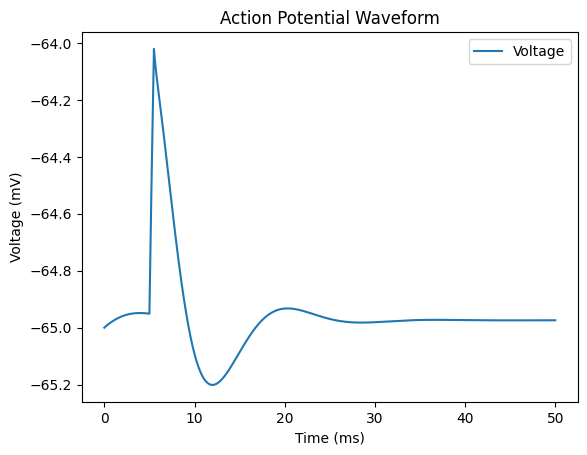

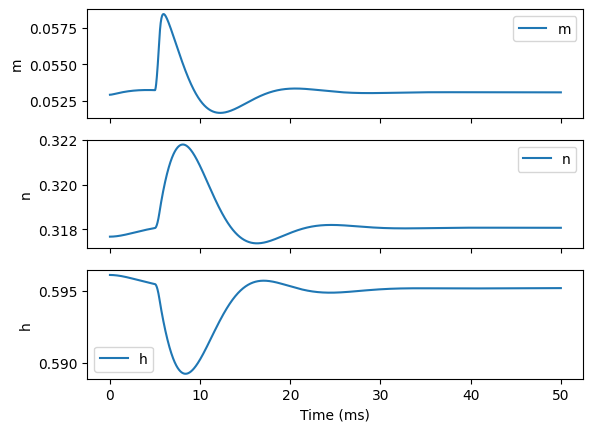

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h, gui

# Create a new neuron model
soma = h.Section(name='soma')
soma.L = 50.0  # section length (microns)
soma.diam = 30.0  # section diameter (microns)
soma.cm = 1.0  # membrane capacitance (uF/cm^2)
soma.Ra = 100.0  # axial resistance (ohm-cm)

# Add the Hodgkin-Huxley mechanism
soma.insert('hh')
soma.gnabar_hh = 0.12  # maximum sodium conductance (S/cm^2)
soma.gkbar_hh = 0.036  # maximum potassium conductance (S/cm^2)
soma.gl_hh = 0.0003  # maximum leak conductance (S/cm^2)
soma.ena = 50.0  # sodium reversal potential (mV)
soma.ek = -77.0  # potassium reversal potential (mV)
soma.el_hh = -54.3  # leak reversal potential (mV)

# Add a current injection stimulus
stim = h.IClamp(soma(0.5))
stim.delay = 5.0  # stimulus delay (ms)
stim.dur = 0.5  # stimulus duration (ms)
stim.amp = 0.1  # stimulus amplitude (nA)

# Set up the recording vectors
v_vec = h.Vector()
t_vec = h.Vector()
m_vec = h.Vector()
n_vec = h.Vector()
h_vec = h.Vector()

v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)
m_vec.record(soma(0.5)._ref_m_hh)
n_vec.record(soma(0.5)._ref_n_hh)
h_vec.record(soma(0.5)._ref_h_hh)

# Set up the simulation
h.dt = 0.025  # time step (ms)
h.tstop = 50.0  # simulation time (ms)

# Run the simulation
h.run()

# Plot the voltage waveform
fig, ax = plt.subplots()
ax.plot(t_vec, v_vec, label='Voltage')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (mV)')
ax.set_title('Action Potential Waveform')
ax.legend()

# Plot the gating variables
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(t_vec, m_vec, label='m')
ax1.set_ylabel('m')
ax1.legend()

ax2.plot(t_vec, n_vec, label='n')
ax2.set_ylabel('n')
ax2.legend()

ax3.plot(t_vec, h_vec, label='h')
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('h')
ax3.legend()

plt.show()



**Figure 5**

Gating values (Superimposed, over longer period of time) 

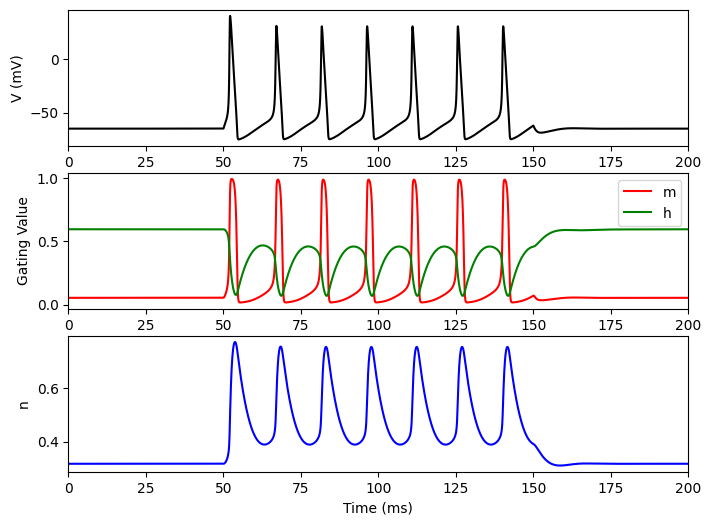

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C_m = 1.0 # membrane capacitance (uF/cm^2)
g_Na = 120.0 # maximum sodium conductance (mS/cm^2)
g_K = 36.0 # maximum potassium conductance (mS/cm^2)
g_L = 0.3 # leak conductance (mS/cm^2)
E_Na = 50.0 # sodium reversal potential (mV)
E_K = -77.0 # potassium reversal potential (mV)
E_L = -54.387 # leak reversal potential (mV)

# Define the stimulus function
def stimulus(t):
    if t > 50 and t < 150:
        return 10.0 # applied current (nA/cm^2)
    else:
        return 0.0

# Define the differential equations
def alpha_m(V):
    return 0.1*(V+40.0)/(1.0-np.exp(-(V+40.0)/10.0))

def beta_m(V):
    return 4.0*np.exp(-(V+65.0)/18.0)

def alpha_h(V):
    return 0.07*np.exp(-(V+65.0)/20.0)

def beta_h(V):
    return 1.0/(1.0+np.exp(-(V+35.0)/10.0))

def alpha_n(V):
    return 0.01*(V+55.0)/(1.0-np.exp(-(V+55.0)/10.0))

def beta_n(V):
    return 0.125*np.exp(-(V+65)/80.0)

def I_Na(V, m, h):
    return g_Na * m**3 * h * (V - E_Na)

def I_K(V, n):
    return g_K * n**4 * (V - E_K)

def I_L(V):
    return g_L * (V - E_L)

def dvdt(t, V, m, h, n):
    return (stimulus(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m

def dmdt(t, V, m):
    return alpha_m(V)*(1.0-m) - beta_m(V)*m

def dhdt(t, V, h):
    return alpha_h(V)*(1.0-h) - beta_h(V)*h

def dndt(t, V, n):
    return alpha_n(V)*(1.0-n) - beta_n(V)*n

# Set up initial conditions
V0 = -65.0 # initial membrane potential (mV)
m0 = alpha_m(V0)/(alpha_m(V0)+beta_m(V0)) # initial sodium activation
h0 = alpha_h(V0)/(alpha_h(V0)+beta_h(V0)) # initial sodium inactivation
n0 = alpha_n(V0)/(alpha_n(V0)+beta_n(V0)) # initial potassium activation

# Set up time array
dt = 0.01 # time step (ms)
T = 200 # total time (ms)
t = np.arange(0, T+dt, dt)

# Solve the differential equations
# Set up arrays to store results
V = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))
n = np.zeros(len(t))

# Set initial values
V[0] = V0
m[0] = m0
h[0] = h0
n[0] = n0

# Integrate the differential equations
for i in range(1, len(t)):
    # Compute derivatives
    dV = dvdt(t[i-1], V[i-1], m[i-1], h[i-1], n[i-1])
    dm = dmdt(t[i-1], V[i-1], m[i-1])
    dh = dhdt(t[i-1], V[i-1], h[i-1])
    dn = dndt(t[i-1], V[i-1], n[i-1])
    # Update variables using Euler's method
    V[i] = V[i-1] + dV*dt
    m[i] = m[i-1] + dm*dt
    h[i] = h[i-1] + dh*dt
    n[i] = n[i-1] + dn*dt

# Plot the results
plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(t, V, 'k')
plt.ylabel('V (mV)')
plt.xlim(0, T)
plt.subplot(3,1,2)
plt.plot(t, m, 'r', label='m')
plt.plot(t, h, 'g', label='h')
plt.legend()
plt.ylabel('Gating Value')
plt.xlim(0, T)
plt.subplot(3,1,3)
plt.plot(t, n, 'b')
plt.xlabel('Time (ms)')
plt.ylabel('n')
plt.xlim(0, T)
plt.show()


**Figure 6**

Sodium and Potassium Conductance

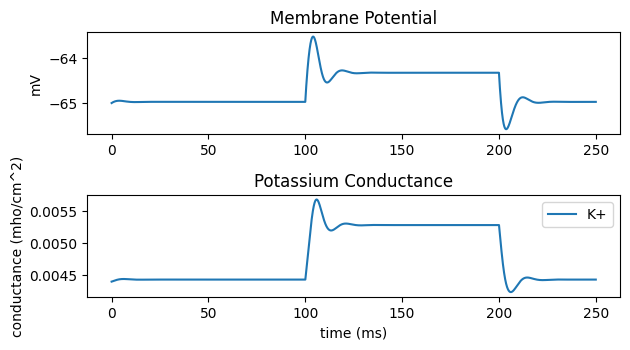

In [9]:
from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np

# Define the Hodgkin-Huxley model parameters
soma = h.Section(name='soma')
soma.L = 20  # length (µm)
soma.diam = 20  # diameter (µm)
soma.insert('hh')

# Set up stimulation
stim = h.IClamp(soma(0.5))
stim.delay = 100  # delay before stimulation (ms)
stim.dur = 100  # duration of stimulation (ms)
stim.amp = 0.01  # amplitude of stimulation (nA)

# Set up recording of voltage and conductance values
rec_t = h.Vector()
rec_t.record(h._ref_t)
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)
rec_gna = h.Vector()
rec_gna.record(soma(0.5)._ref_ina)
rec_gk = h.Vector()
rec_gk.record(soma(0.5)._ref_ik)

# Run the simulation
h.finitialize(-65)
h.continuerun(250)

# Plot the results
plt.subplot(3,1,1)
plt.plot(rec_t, rec_v)
plt.title('Membrane Potential')
plt.ylabel('mV')

plt.subplot(3,1,2)
# plt.plot(rec_t, rec_gna, label='Na+')
plt.plot(rec_t, rec_gk, label='K+')
plt.title('Potassium Conductance')
plt.ylabel('conductance (mho/cm^2)')
plt.legend()




# plt.subplot(3,1,3)
# plt.plot(np.array(stim.as_numpy()), color='red')
plt.xlabel('time (ms)')
# plt.ylabel('current (nA)')

plt.tight_layout()
plt.show()

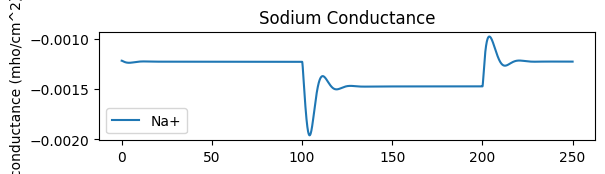

In [10]:
plt.subplot(3,1,2)
plt.plot(rec_t, rec_gna, label='Na+')
# plt.plot(rec_t, rec_gk, label='K+')
plt.title('Sodium Conductance')
plt.ylabel('conductance (mho/cm^2)')
plt.legend()

**Figure 7**

Voltage clamping 

With different constant input current values
```
a) i = 0 nA
b) i = 0.02 nA
c) i = 0.02830 nA
d) i = 0.02831 nA
e) i = 0.1 nA
f) i = 10 nA
```


Change the values of stim.amp in the below code to obtain different graphs

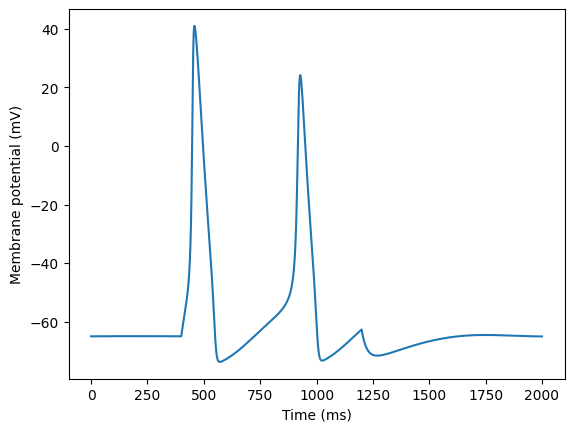

In [11]:
from neuron import h, gui
import matplotlib.pyplot as plt

# Create a soma section
soma = h.Section(name='soma')

# Define the membrane properties of the soma
soma.insert('hh')
soma.Ra = 100   # Axial resistance in Ohm*cm
soma.cm = 1     # Membrane capacitance in uF/cm^2
soma.diam = 20  # Diameter in um
soma.L = 20     # Length in um

# Set the simulation parameters
h.tstop = 50    # Simulation time in ms
h.dt = 0.025    # Time step in ms

# Inject a constant current
stim = h.IClamp(soma(0.5))
stim.delay = 10  # Delay in ms
stim.dur = 20    # Duration in ms
stim.amp = 0.2831   # Amplitude in nA

#0.2830 imp...

# Record the membrane potential
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

# Run the simulation
h.finitialize(-65)  # Set the initial membrane potential
h.run()

# Plot the results

plt.plot(rec_v)
# plt.text(15, 0, 'Sine wave', fontsize = 15)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')

plt.show()


**Figure 8**

Temperature changes during depolarization, repolarization, hyperpolarization

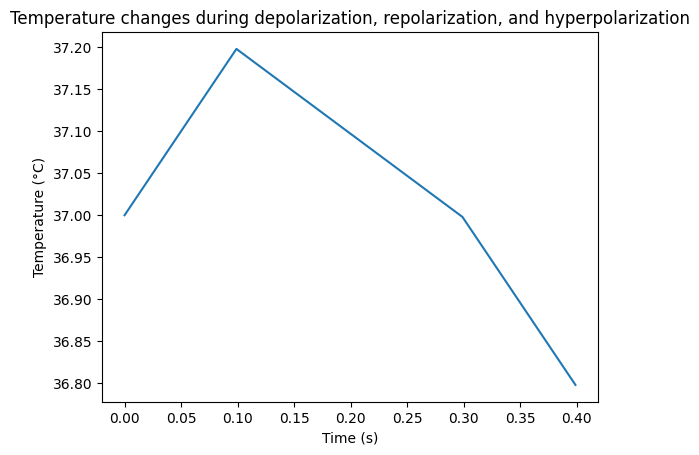

In [12]:
# temp change with stimulai
import numpy as np
import matplotlib.pyplot as plt

# Set the initial temperature of the neuron
initial_temperature = 37  # in degrees Celsius

# Define the temperature changes during depolarization, repolarization, and hyperpolarization
depolarization_temp_change = 2  # in degrees Celsius
repolarization_temp_change = -1  # in degrees Celsius
hyperpolarization_temp_change = -2  # in degrees Celsius

# Define the time intervals for each process
depolarization_duration = 0.1  # in seconds
repolarization_duration = 0.2  # in seconds
hyperpolarization_duration = 0.1  # in seconds

# Define the time steps for the simulation
time_step = 0.001  # in seconds
total_time = depolarization_duration + repolarization_duration + hyperpolarization_duration
time = np.arange(0, total_time, time_step)

# Initialize the temperature array
temperature = np.zeros_like(time)
temperature[0] = initial_temperature

# Simulate the temperature changes during depolarization
depolarization_steps = int(depolarization_duration / time_step)
for i in range(1, depolarization_steps):
    temperature[i] = temperature[i-1] + depolarization_temp_change * time_step

# Simulate the temperature changes during repolarization
repolarization_steps = int(repolarization_duration / time_step)
for i in range(depolarization_steps, depolarization_steps + repolarization_steps):
    temperature[i] = temperature[i-1] + repolarization_temp_change * time_step

# Simulate the temperature changes during hyperpolarization
hyperpolarization_steps = int(hyperpolarization_duration / time_step)
for i in range(depolarization_steps + repolarization_steps, depolarization_steps + repolarization_steps + hyperpolarization_steps):
    temperature[i] = temperature[i-1] + hyperpolarization_temp_change * time_step

# Plot the temperature changes over time
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature changes during depolarization, repolarization, and hyperpolarization')
plt.show()


**Additional Graphs**

Not added in our report

Changed dt


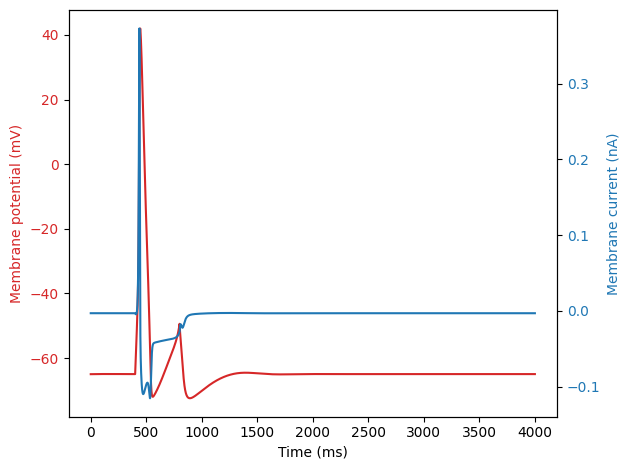

In [13]:
from neuron import h, gui
import matplotlib.pyplot as plt

# Define the Hodgkin-Huxley model
soma = h.Section(name='soma')
soma.insert('hh')
soma.L = 20  # microns
soma.diam = 20  # microns
soma.cm = 1  # uF/cm^2

# Define the stimulus amplitude and duration
stim_amp = 0.5  # nA
stim_dur = 10  # ms

# Create vectors to record the membrane potential and current
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)
rec_ina = h.Vector()
rec_ina.record(soma(0.5)._ref_ina)
rec_ik = h.Vector()
rec_ik.record(soma(0.5)._ref_ik)

# Define the simulation parameters
tstop = 100  # ms
dt = 0.1  # ms
h.tstop = tstop
h.dt = dt

# Set up the current injection
stim = h.IClamp(soma(0.5))
stim.delay = 10  # ms
stim.dur = stim_dur  # ms
stim.amp = stim_amp  # nA

# Run the simulation
h.finitialize(-65)
h.run()

# Calculate the membrane current
membrane_current = []
for i in range(len(rec_v)):
    ina = rec_ina[i]
    ik = rec_ik[i]
    membrane_current.append(-(ina + ik))

# Plot the membrane potential and current
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color=color)
ax1.plot(rec_v, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Membrane current (nA)', color=color)
ax2.plot(membrane_current, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


#In this code, We've recorded the sodium and potassium currents using the rec
#_ina and rec_ik vectors, respectively. Then, We've calculated the membrane current
# at each time step as the sum of these two currents, and stored it in a list called
# membrane_current. Finally, We've plotted the membrane potential and current on the same 
# graph using matplotlib. This should allow you to visualize the relationship between the membrane potential and current during the simulation.